# Bank Customer Churn Analysis

In [1]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


- Downloading and Extracting the Dataset

First, we download the dataset from Kaggle:

In [2]:
!kaggle datasets download -d "gauravtopre/bank-customer-churn-dataset"

bank-customer-churn-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


This command downloads the dataset titled "Bank Customer Churn Dataset" from Kaggle.

Next, we extract the downloaded dataset:

In [3]:
import zipfile
with zipfile.ZipFile("bank-customer-churn-dataset.zip", "r") as file:
    file.extractall("churn dataset")

-  The dataset, which is in a ZIP file, is extracted into a folder named "churn dataset".

In [4]:
import os
os.listdir("churn dataset")

['Bank Customer Churn Prediction.csv']

In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


- To start the analysis, we load the data into a pandas DataFrame:
This code reads the CSV file into a DataFrame df and displays the first five rows.

In [6]:
df = pd.read_csv('churn dataset/Bank Customer Churn Prediction.csv')
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##  Initial Data Exploration
General Information
- We obtain general information about the dataset:

In [7]:
#Get general info about customer dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Analyzing the data types of each column:

- This code counts the occurrences of each data type in the DataFrame.

In [8]:
#Get count analysis of datatypes in the customer dataset.
df.dtypes.value_counts()

int64      8
object     2
float64    2
Name: count, dtype: int64

In [9]:
#To check for missing values
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

-   generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution.

In [10]:
#SUMMARY STATISTICS
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


###  EXPLORATORY DATA ANALYSIS

- Count the number of instances in the dataset where customers have either exited or retained a service

In [12]:
# Count the number of instances for 'exited' (1) and 'retained' (0)
num_retained = df['churn'].value_counts()[0]
num_exited = df['churn'].value_counts()[1]

print("Number of retained instances:", num_retained)
print("Number of exited instances:", num_exited)

Number of retained instances: 7963
Number of exited instances: 2037


####   Create a donut chart for visualizing the proportions of churned and retained customers in a dataset.

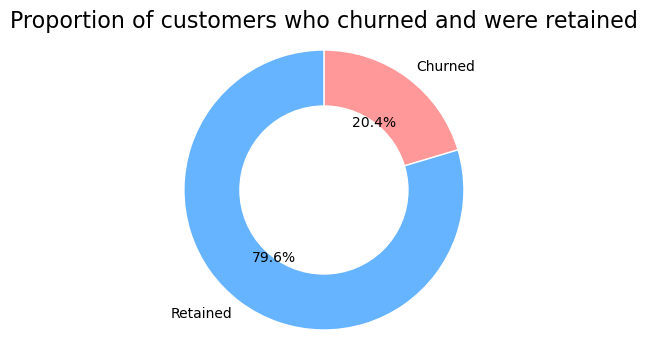

In [13]:
# Define data
labels = ['Churned', 'Retained']
sizes = [df['churn'].sum(), df['churn'].count() - df['churn'].sum()]
total = sum(sizes)
percentages = [size/total * 100 for size in sizes]

# Create sunburst chart
plt.figure(figsize=(5, 4))

# Define the colors (using a more colorful palette)
colors = ['#ff9999','#66b3ff']  # Light Red and Light Blue

plt.pie(sizes, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%',
        colors=colors, wedgeprops={'edgecolor': 'white'})

# Add circle in the middle to create the donut chart
circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(circle)

# Add a title
plt.title("Proportion of customers who churned and were retained", fontsize=16)

plt.axis('equal')

# Show plot
plt.show()

- The doughnut chart visualizes the proportion of customers who churned versus those who were retained. The majority of the customer base, 79.6%, remained with the service or company, while 20.4% churned. 
-   The high retention rate is positive, but the significant churn rate warrants investigation to minimize costs and implement targeted retention strategies.

#### Generate  boxplots for numeric variables in the dataset, 
- The boxplots provides  insights into the distribution of each variable, including the presence of outliers.


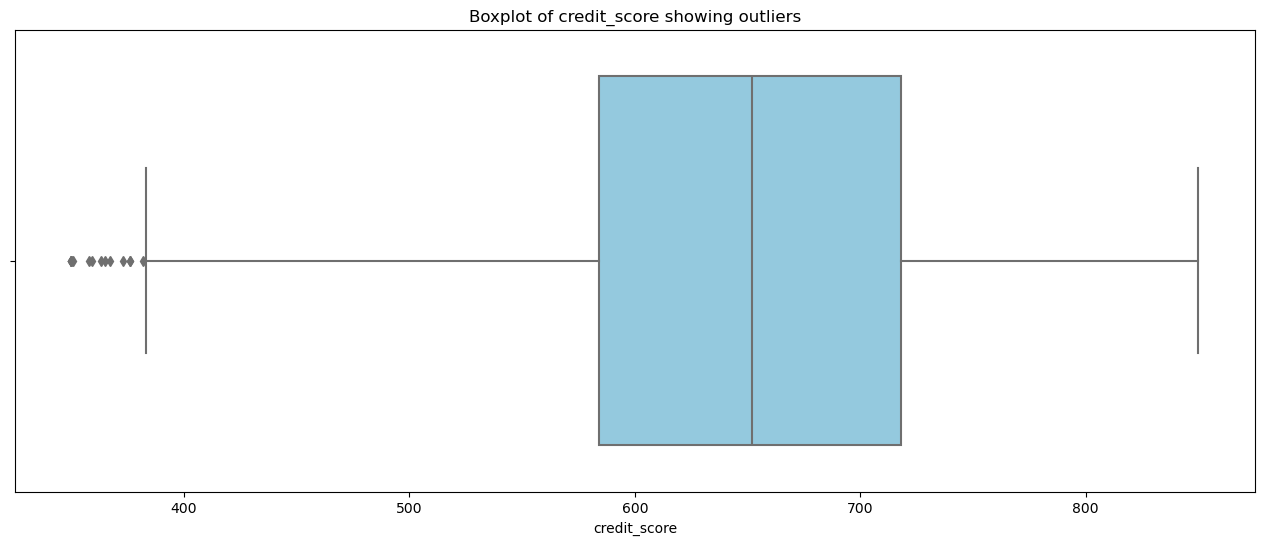

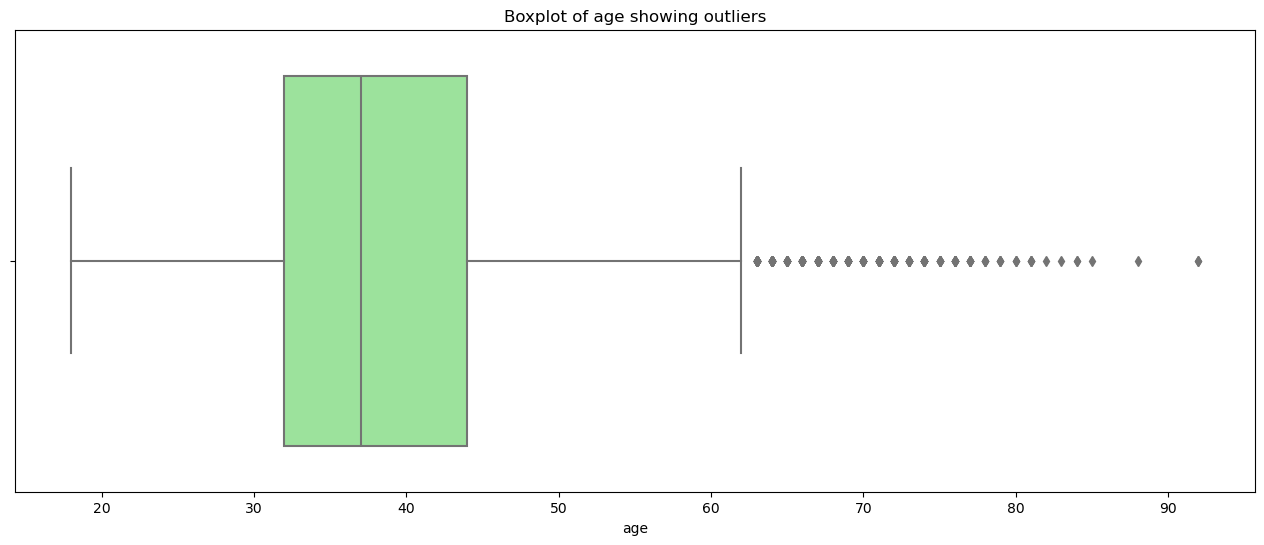

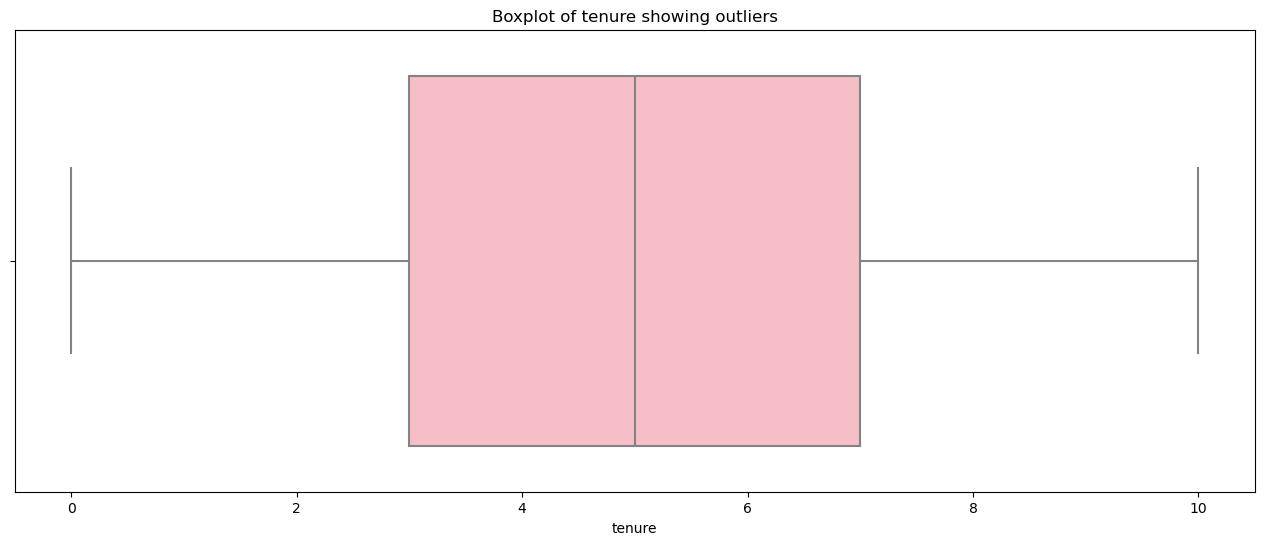

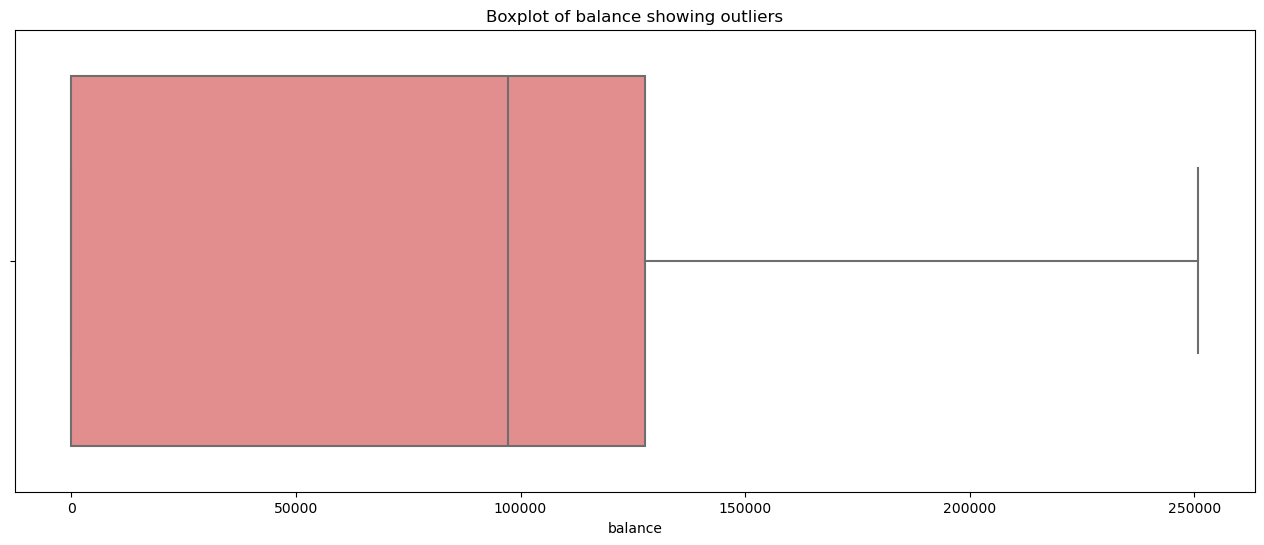

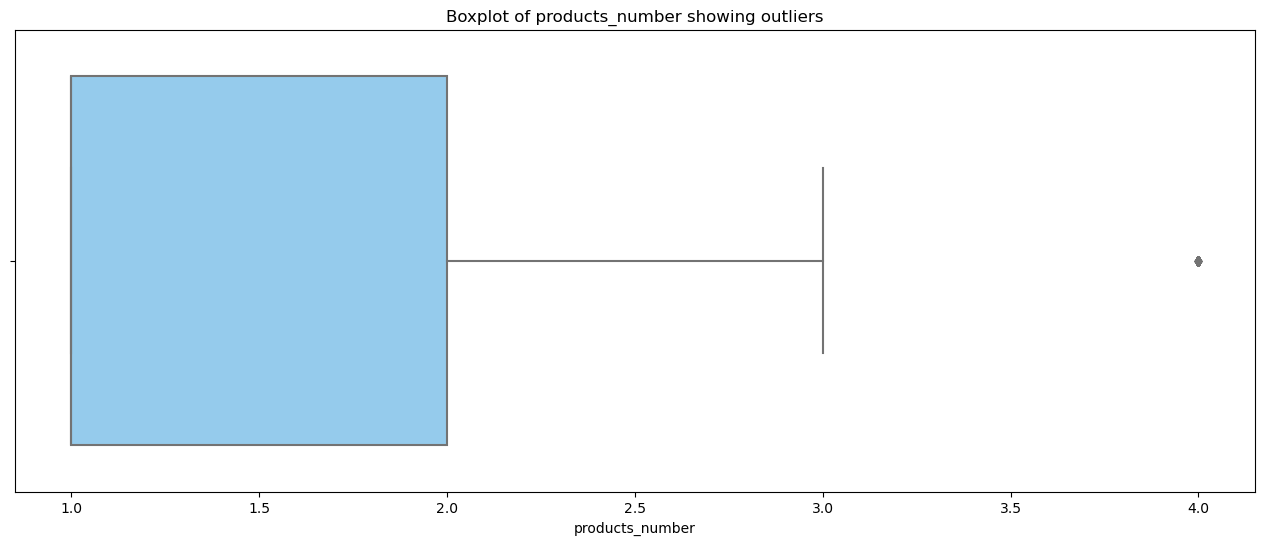

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric variables
numeric_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'active_member', 'estimated_salary']

# List of colors for the boxplots
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightcoral', 'lightskyblue']

for var, color in zip(numeric_vars, colors):
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=var, data=df, color=color)  # Apply the color from the colors list
    plt.title(f"Boxplot of {var} showing outliers")
    plt.show()


-   The boxplot for credit scores shows an even distribution across the middle 50% of data, with a median score around the 650 mark. Outliers indicate a small number of customers with significantly lower scores. The credit score outliers may represent a segment with potentially higher credit risks,
-   The age distribution is narrow, with the median age around the late 30s to early 40s. The age outliers may indicate a broader age range of service appeal, and the product number distribution suggests most customers prefer fewer products.
-   The product number distribution shows a concentration of data at the lower end, with the median at one product. Outliers at the higher end suggest very few customers use a large number of products. The lack of spread in the IQR and the position of the median suggest most customers are clustered around using a single product or service.  

####   Create a series of histograms for selected numeric variables, offering a graphical representation of their distribution and frequency.

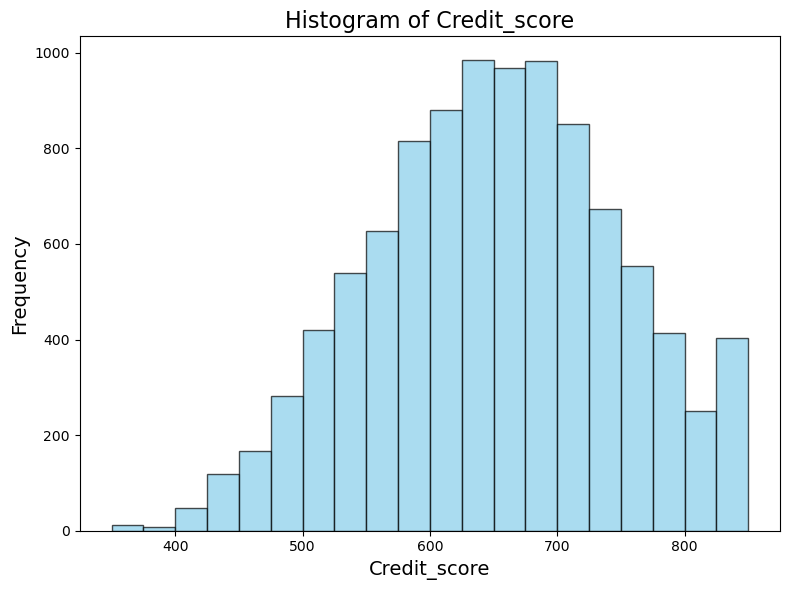

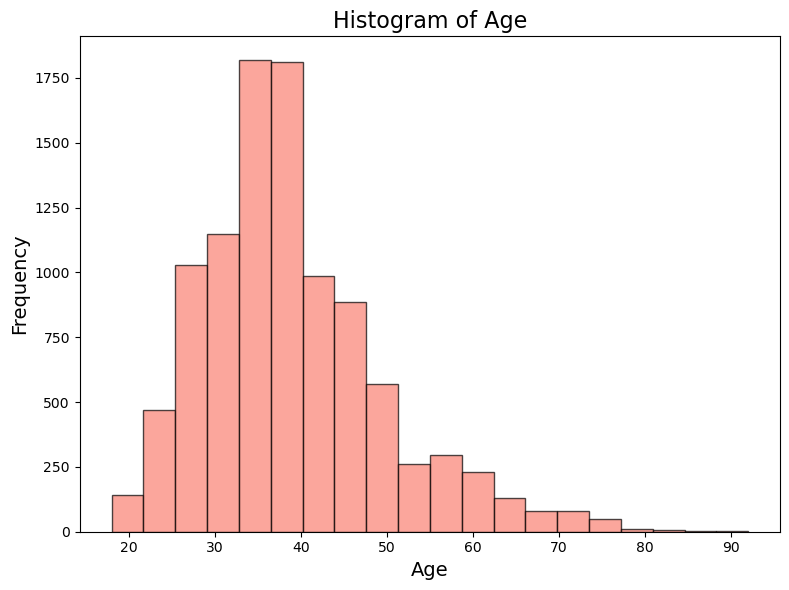

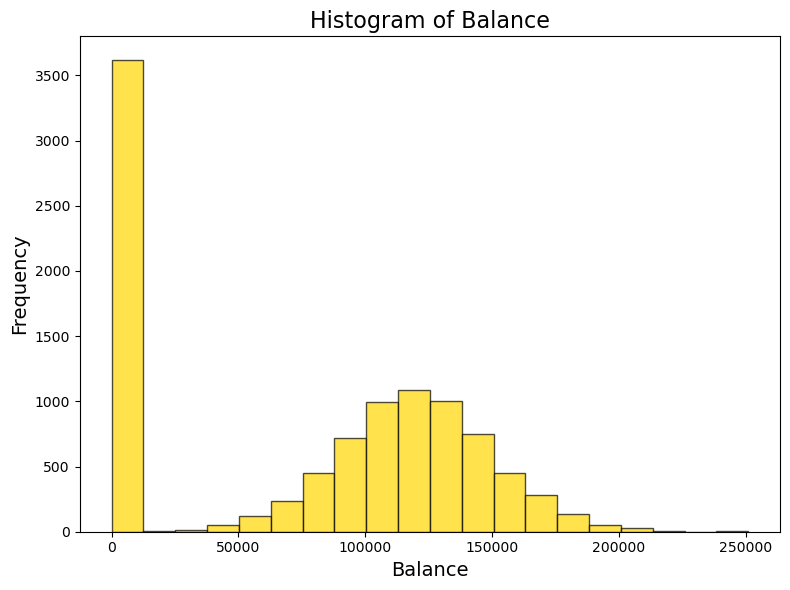

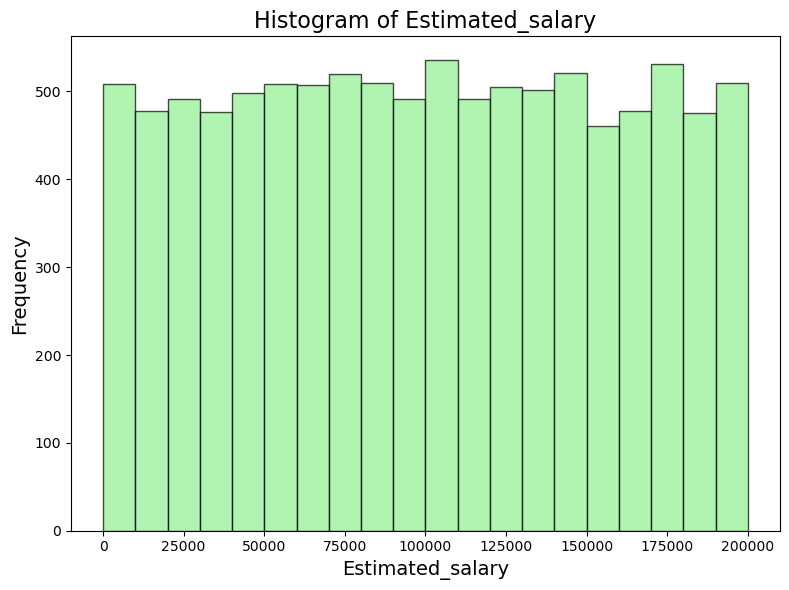

In [15]:
# Numeric variables to visualize outliers
numeric_vars = ['credit_score', 'age', 'balance', 'estimated_salary'] 		

# Colors for each histogram
colors = ['skyblue', 'salmon', 'gold', 'lightgreen', 'plum']

# Plot histograms for each numeric variable
for var, color in zip(numeric_vars, colors):
    plt.figure(figsize=(8, 6))
    plt.hist(df[var], bins=20, color=color, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {var.capitalize()}', fontsize=16)  # Capitalize the variable name for the title
    plt.xlabel(var.capitalize(), fontsize=14)  # Capitalize the variable name for the x-axis label
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    plt.show()


-   These histograms provide a visual summary of the key numerical data within the dataset. The credit score and age distributions suggest typical demographic patterns, while the balance histogram highlights a potential anomaly or unique feature in how customers are distributed by their account balance. The uniform distribution of estimated salaries may suggest that salary is not a variable with much variance in this particular dataset, or that the company serves a wide range of income levels equally.

- Credit Score:
    -   The distribution is bell-shaped, which suggests a normal distribution of credit scores among the customers. Most scores center around the median, with fewer customers having very low or very high scores. The slight right skew indicates more customers have higher credit scores than lower.

- Age:
    - The age distribution is also bell-shaped but with a slight right skew. This indicates that while most customers are middle-aged, there is a tail of older customers.
Histogram of Balance:
    -   This histogram shows a significant number of customers with a zero balance, which is distinctly separate from the rest of the distribution. The remaining balances appear to be roughly uniformly distributed, with fewer customers having very high balances.

-   Estimated Salary:
    -   The salary distribution looks fairly uniform across the range, suggesting that salary may not be a distinguishing feature among the customers. There is no clear concentration of customers at any specific salary level, and it is interesting to note the consistency across all salary levels.

- Generate dodge bar plots for different variables in a dataset, with a focus on comparing the counts of retained and churned customers across various categories

In [16]:

# Define variables
vars = ['country', 'gender', 'credit_card', 'active_member', 'products_number'] 

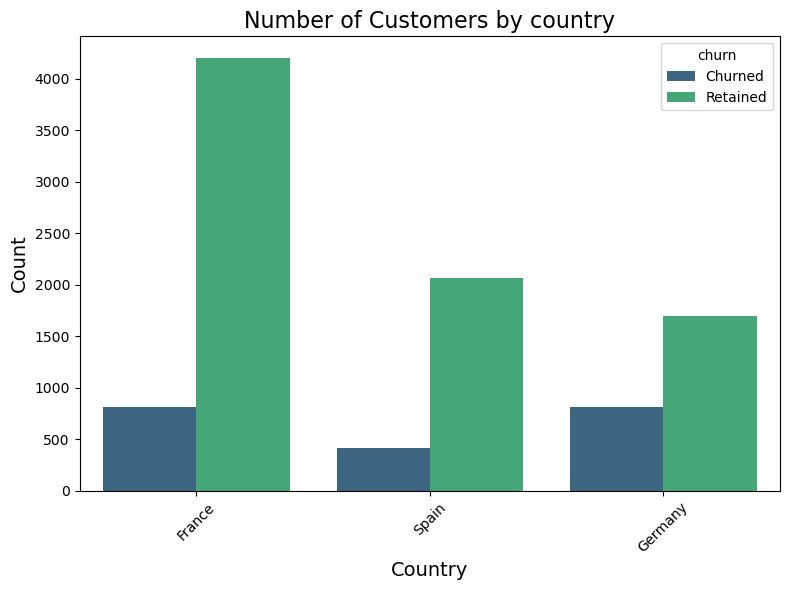

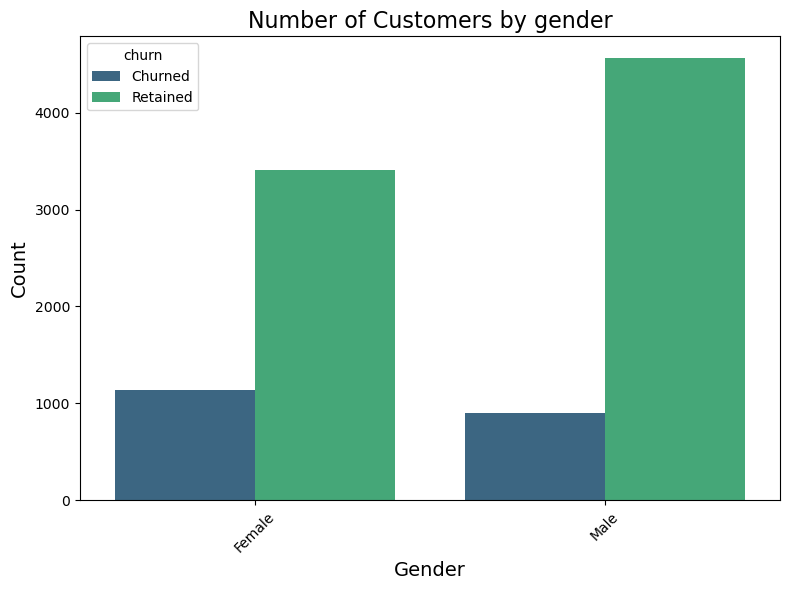

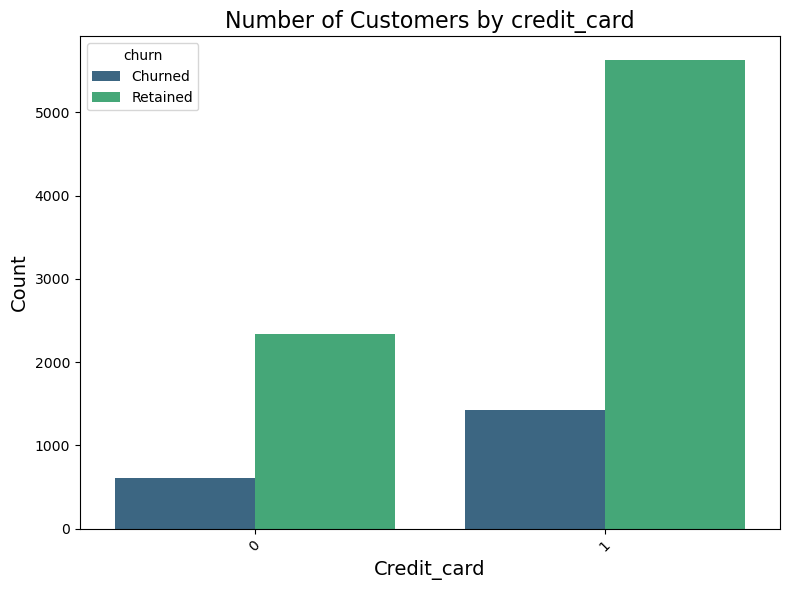

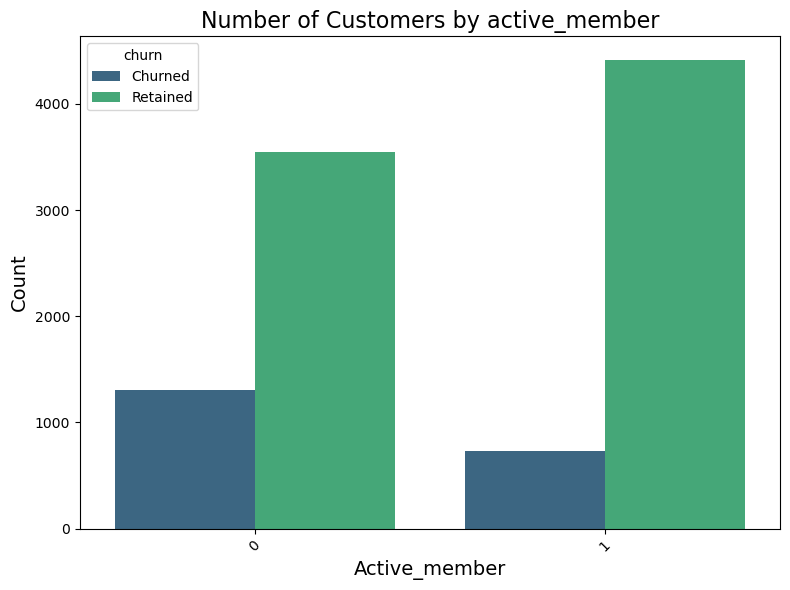

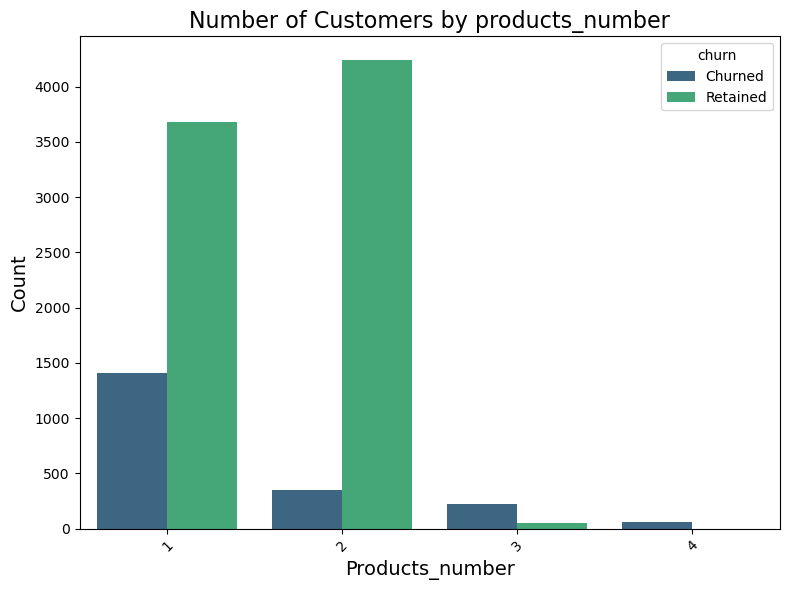

In [36]:
df['churn'] = df['churn'].astype(str)

# Plot using dodge bar plot
for var in vars:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=var, hue='churn', data=df, dodge=True, palette='viridis')
    ax.set_title(f'Number of Customers by {var}', fontsize=16)
    ax.set_xlabel(var.capitalize(), fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    plt.legend(title='churn', labels=['Churned', 'Retained'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



-   Number of Customers by Country:
    -   The bar chart shows that the number of retained customers is higher than the number of churned customers in each country.
    -   France has a noticeably higher number of retained customers compared to Germany and Spain, this might indicate regional differences in customer satisfaction.
    -   The churn rate relative to the number of retained customers could also vary by country, indicating that some markets may be more competitive or have different customer expectations.

-  Number of Customers by Gender:
    -   This chart shows a distribution of customer retention and churn by gender.
    -   The significantly higher churn rate of the female class could suggest a need to tailor customer engagement strategies for that demographic.
    -   Could also signify that gender is a significant factor in customer retention for the company's products or services. 

-   Number of Customers by Credit Card Ownership:
    -   The visualization indicates that customers who own a credit card have a higher retention rate, which could imply that having a credit card is associated with a higher likelihood of staying with the company. However, we see a significant churn rate is seen for customers who own a credit card. 
    -   Credit card ownership may reflect market saturation, making it easier to switch between service providers. Financial behaviour may also influence churn decisions. Competitive offers may also attract customers, particularly younger or higher-income customers. Service dissatisfaction could also contribute to higher churn rates.

-   Number of Customers by Active Membership:
    -   The bar chart indicates that active members are less likely to churn compared to inactive ones. The Retained class is significant for active members, suggesting that active engagement with the company's services or products is associated with higher retention rates.  Conversely, the significant number of  churned inactive members highlights a potential area for improvement in engaging and retaining these customers.

-   Number of Customers by Products Number:
    -   This bar chart shows the distribution of retained and churned customers based on the number of products they use. Most customers have two products and customers with one product are more likel to churn. It implies that customers engaged with more range of products tend to stay with the company. This can suggest customer loyalty increases with product variety or integration. 
    -   On the other hand, a spike the Churned customers with three products could indicate points where customers feel overwhelmed or dissatisfied with the product offerings or where the bank might be losing customers to competitors.

In [18]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [19]:
numeric_data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,42,2,0.00,1,1,1,101348.88
1,15647311,608,41,1,83807.86,1,0,1,112542.58
2,15619304,502,42,8,159660.80,3,1,0,113931.57
3,15701354,699,39,1,0.00,2,0,0,93826.63
4,15737888,850,43,2,125510.82,1,1,1,79084.10


In [20]:
categorical_data.head()

,country,gender,churn
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [22]:
churn_column = df['churn'].copy()

-   The StandardScaler standardizes features by removing the mean and scaling to unit variance. This is particularly important when different features have different scales.
- Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale. Scaling can also help in reducing the impact of outliers.
-   prepare the numeric data for machine learning models, ensuring that the features contribute equally to the model's performance and making algorithms less sensitive to the scale of features.

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialise the standard scalre and scale the data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numeric_data)

# convert the scaled data back to a DataFrame:
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numeric_data.columns)


 -  Perform one-hot encoding on categorical columns and then converts the resulting DataFrame to an integer type
 -  Machine learning models generally require numerical input, so categorical data are often transformed into numbers. One-hot encoding is a standard method for this transformation

In [24]:
# One-hot encode the categorical columns
encoded_categorical_df = pd.get_dummies(df[['country', 'gender']])

# Convert the DataFrame to integer type
encoded_categorical_df = encoded_categorical_df.astype(int)

In [25]:
# Combine scaled numerical data and encoded categorical data
df_concat = pd.concat([scaled_numerical_df, encoded_categorical_df, churn_column], axis=1)


In [26]:
df_concat.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male,churn
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1,0,0,1,0,1
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,0,1,1,0,0
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1,0,0,1,0,1
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1,0,0,1,0,0
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,0,1,1,0,0


 -  Use of the Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance in the dataset, followed by a train-test split. 

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Assign the target variable
# Assign the target variable and convert to integer
y = df_concat["churn"].astype(int)
X = df_concat.drop('churn', axis=1)

# Instantiate the SMOTE oversampling technique
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

# Apply SMOTE to generate the oversampled dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Check the new class distribution (optional)
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({0: 7963, 1: 2037})
Resampled class distribution: Counter({1: 7963, 0: 7963})


In [28]:
%pip install lightgbm
%pip install xgboost
%pip install catboost


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


 ####   Implemente a voting classifier using three popular gradient boosting frameworks: LightGBM, XGBoost, and CatBoost. 
 -  The aim is to combine the predictive power of each individual model into a single, more robust classifier.

In [33]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Define the individual models
lgbm = LGBMClassifier(
    objective='binary', boosting_type='gbdt', metric="auc",
    random_state=42, colsample_bytree=0.56, subsample=0.35,
    learning_rate=0.05, max_depth=8, n_estimators=500,
    num_leaves=140, reg_alpha=0.14, reg_lambda=0.85, verbosity=-1)

xgb = XGBClassifier(
    objective='binary:logistic', eval_metric="auc", random_state=42,
    colsample_bytree=0.25, learning_rate=0.07, max_depth=8,
    n_estimators=800, reg_alpha=0.09, reg_lambda=0.70,
    min_child_weight=22, verbosity=0)

cat = CatBoostClassifier(
    iterations=500, objective='Logloss', eval_metric="AUC",
    early_stopping_rounds=1000, bagging_temperature=0.1,
    colsample_bylevel=0.88, learning_rate=0.065, max_depth=7,
    l2_leaf_reg=1, min_data_in_leaf=25, random_strength=0.1,
    max_bin=100, verbose=0)

# Define the voting classifier
vote = VotingClassifier(estimators=[('lgbm', lgbm), ('xgb', xgb), ('cat', cat)], voting='soft', weights=[2, 1, 1])

# Fit and evaluate each individual model
models = {'LGBM': lgbm, 'XGB': xgb, 'CatBoost': cat, 'VotingClassifier': vote}
for name, model in models.items():
    print(f"Fitting {name} model...")
    model.fit(X_train, y_train)

    print(f"Predicting on the test data with {name} model...")
    y_pred_test = model.predict_proba(X_test)[:, 1]

    auc_test = roc_auc_score(y_test, y_pred_test)
    print(f"{name} Test ROC AUC Score: {auc_test}\n")


Fitting LGBM model...
Predicting on the test data with LGBM model...
LGBM Test ROC AUC Score: 0.9685940225224469

Fitting XGB model...
Predicting on the test data with XGB model...
XGB Test ROC AUC Score: 0.9602790209241155

Fitting CatBoost model...
Predicting on the test data with CatBoost model...
CatBoost Test ROC AUC Score: 0.9662135258060356

Fitting VotingClassifier model...
Predicting on the test data with VotingClassifier model...
VotingClassifier Test ROC AUC Score: 0.9684632818502503



-   The models perform well, with AUC scores ranging from 0.96 to 0.97, which are considered excellent in most contexts. 
-   The LGBM and the VotingClassifier have the highest scores, making them slightly better at distinguishing between the positive and negative classes in this particular test set.

####  Get a  visual and numeric way to understand the model's performance, particularly the types of errors it makes (false positives and false negatives)

VotingClassifier Accuracy: 0.9123

VotingClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      2426
           1       0.93      0.89      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



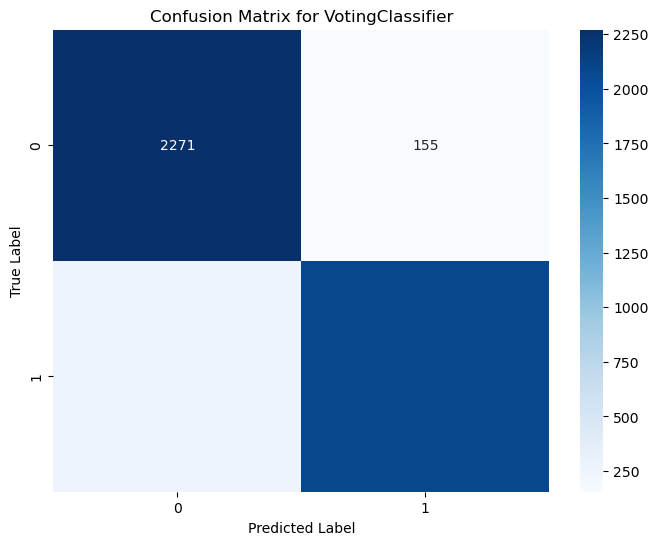

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'vote' is your trained VotingClassifier
models = {'VotingClassifier': vote}

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


-   The confusion matrix shows the model's accuracy in predicting negative classes 2271 times, false positives 155 times. 
-   The classification report provides key metrics for model performance, including precision (0 class - 0.90, 1 class - 0.93), recall (0 class - 0.94, 1 class - 0.89), F1-score (0 class - 0.92, 1 class - 0.91), support (0 class - 2426, 1 class - 2352), accuracy (91%), macro average (without class imbalance), and weighted average (weighted by the number of instances in each class). 
-   The F1-score for class 0 is 0.92, indicating good model performance for both classes. The support is the number of actual instances of the class in the dataset.

In [44]:
!jupyter nbconvert --to script "Customer churn prediction.ipynb"



[NbConvertApp] Converting notebook Customer churn prediction.ipynb to script
[NbConvertApp] Writing 17994 bytes to Customer churn prediction.py
